In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.stats import norm 
import energyflow as ef #needed for the Geant4 datasets

In [2]:
import tensorflow as tf
from keras.layers import Dense, Input
from keras.models import Model
import tensorflow.keras.backend as K

import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ['CUDA_VISIBLE_DEVICES']="3"
# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=24220)]) #in MB

/home/rikab/miniconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## Read in the Delphes Dataset

In [3]:
w10 = 4.568e-10
w14 = 1.380e-11
w18 = 4.347e-13

In [4]:

myfile = open("Datasets/dijets.txt")
delphes_v2 = []
for line in myfile:
    if (len(line.split()) < 20):
        continue
    delphes_v2+=[[float(line.split()[0]),float(line.split()[1]),
               float(line.split()[2]),float(line.split()[3]),
               float(line.split()[4]),float(line.split()[5]),
               float(line.split()[6]),float(line.split()[7]),
               float(line.split()[8]),float(line.split()[9]),
               float(line.split()[10]),float(line.split()[11]),
               float(line.split()[12]),float(line.split()[13]),
               float(line.split()[14]),float(line.split()[15]),
               float(line.split()[16]),float(line.split()[17]),
               float(line.split()[18]),float(line.split()[19])]]
delphes_v2 = np.array(delphes_v2)

myfile = open("Datasets/dijets14.txt")
delphes14_v2 = []
for line in myfile:
    if (len(line.split()) < 20):
        continue
    delphes14_v2+=[[float(line.split()[0]),float(line.split()[1]),
               float(line.split()[2]),float(line.split()[3]),
               float(line.split()[4]),float(line.split()[5]),
               float(line.split()[6]),float(line.split()[7]),
               float(line.split()[8]),float(line.split()[9]),
               float(line.split()[10]),float(line.split()[11]),
               float(line.split()[12]),float(line.split()[13]),
               float(line.split()[14]),float(line.split()[15]),
               float(line.split()[16]),float(line.split()[17]),
               float(line.split()[18]),float(line.split()[19])]]
delphes14_v2 = np.array(delphes14_v2)

myfile = open("Datasets/dijets18.txt")
delphes18_v2 = []
for line in myfile:
    if (len(line.split()) < 20):
        continue
    delphes18_v2+=[[float(line.split()[0]),float(line.split()[1]),
               float(line.split()[2]),float(line.split()[3]),
               float(line.split()[4]),float(line.split()[5]),
               float(line.split()[6]),float(line.split()[7]),
               float(line.split()[8]),float(line.split()[9]),
               float(line.split()[10]),float(line.split()[11]),
               float(line.split()[12]),float(line.split()[13]),
               float(line.split()[14]),float(line.split()[15]),
               float(line.split()[16]),float(line.split()[17]),
               float(line.split()[18]),float(line.split()[19])]]
delphes18_v2 = np.array(delphes18_v2)

In [5]:
delphes_v2_all = np.concatenate([delphes_v2,delphes14_v2,delphes18_v2])
delphes_weights = np.concatenate([w10*np.ones(len(delphes_v2)),w14*np.ones(len(delphes14_v2)),w18*np.ones(len(delphes18_v2))])

Text(0.5, 0, '$m_{jj}$ [GeV]')

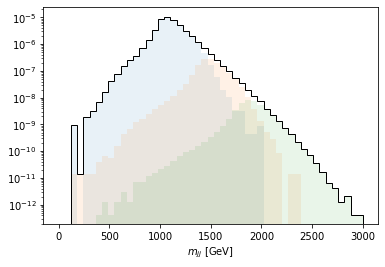

In [6]:
plt.hist(delphes_v2[:,1],weights=w10*np.ones(len(delphes_v2)),alpha=0.1,bins=np.linspace(0,3000,50))
plt.hist(delphes14_v2[:,1],weights=w14*np.ones(len(delphes14_v2)),alpha=0.1,bins=np.linspace(0,3000,50))
plt.hist(delphes18_v2[:,1],weights=w18*np.ones(len(delphes18_v2)),alpha=0.1,bins=np.linspace(0,3000,50))
plt.hist(delphes_v2_all[:,1],weights=delphes_weights,histtype="step",color="black",bins=np.linspace(0,3000,50))
plt.yscale("log")
plt.xlabel("$m_{jj}$ [GeV]")

In [7]:
#mjj

mjjs_delphes = []
mjjsg_delphes = []
weights_delphes = []
pTs_delphes = []
pTsg_delphes = []
etas_delphes = []
etasg_delphes = []

print(delphes_v2[0])

for i in range(len(delphes_v2)):
    
    #Truth
    pT1g = delphes_v2[i,1]
    pT2g = delphes_v2[i,11]
    
    y1g = delphes_v2[i,2]
    y2g = delphes_v2[i,12]
    
    phi1g = delphes_v2[i,3]
    phi2g = delphes_v2[i,13]
    
    m1g = delphes_v2[i,4]
    m2g = delphes_v2[i,14]
    
    ET1g = np.sqrt(pT1g**2+m1g**2)
    ET2g = np.sqrt(pT2g**2+m2g**2)
    
    mJJg = m1g**2+m2g**2+2*(ET1g*ET2g*np.cosh(y1g-y2g)-pT1g*pT2g*np.cos(phi1g-phi2g))
    mjjsg_delphes+=[mJJg**0.5]
    mjjsg_delphes+=[mJJg**0.5]
    pTsg_delphes+=[pT1g]
    pTsg_delphes+=[pT2g]
    etasg_delphes+=[y1g]
    etasg_delphes+=[y2g]
    
    #Reco
    pT1 = delphes_v2[i,6]
    pT2 = delphes_v2[i,16]
    
    y1 = delphes_v2[i,7]
    y2 = delphes_v2[i,17]
    
    phi1 = delphes_v2[i,8]
    phi2 = delphes_v2[i,18]
    
    m1 = delphes_v2[i,9]
    m2 = delphes_v2[i,19]
    
    ET1 = np.sqrt(pT1**2+m1**2)
    ET2 = np.sqrt(pT2**2+m2**2)
    
    mJJ = m1**2+m2**2+2*(ET1*ET2*np.cosh(y1-y2)-pT1*pT2*np.cos(phi1-phi2))
    mjjs_delphes+=[mJJ**0.5]
    mjjs_delphes+=[mJJ**0.5]
    pTs_delphes+=[pT1g]
    pTs_delphes+=[pT2g]
    etas_delphes+=[y1]
    etas_delphes+=[y2]
    
    weights_delphes+=[delphes_weights[i]]
    weights_delphes+=[delphes_weights[i]]

[ 0.00000e+00  9.60283e+02  4.05912e-01 -2.75399e+00  4.55495e+01
  1.00000e+00  9.87996e+02  4.06273e-01 -2.75291e+00  4.55495e+01
  1.00000e+00  6.65562e+02 -2.74401e-01  4.01456e-01  2.22392e+01
  0.00000e+00  1.01406e+03 -2.79573e-01  3.86054e-01  2.22392e+01]


## Read in the Geant4 Dataset

In [8]:
sim = ef.mod.load(dataset='sim',subdatasets=["SIM1000_Jet300_pT375-infGeV"])
gen = ef.mod.load(dataset='gen',subdatasets=["GEN1000_pT375-infGeV"])

sim14 = ef.mod.load(dataset='sim',subdatasets=["SIM1400_Jet300_pT375-infGeV"])
sim18 = ef.mod.load(dataset='sim',subdatasets=["SIM1800_Jet300_pT375-infGeV"])

gen14 = ef.mod.load(dataset='gen',subdatasets=["GEN1400_pT375-infGeV"])
gen18 = ef.mod.load(dataset='gen',subdatasets=["GEN1800_pT375-infGeV"])

In [9]:
simjets_f = sim.jets_f[0:20000]
sim14jets_f = sim14.jets_f[0:20000]
sim18jets_f = sim18.jets_f[0:20000]

In [10]:
#mjj

simjets = np.concatenate([sim.jets_f,sim14.jets_f,sim18.jets_f])

mjjs = []
mjjsg = []
weights = []
pTs = []
pTsg = []
etas = []
etasg = []
for i in range(int(len(simjets)/2.)):
    
    #Truth
    pT1g = simjets[2*i,8]
    pT2g = simjets[2*i+1,8]
    
    y1g = simjets[2*i,9]
    y2g = simjets[2*i+1,9]
    
    phi1g = simjets[2*i,10]
    phi2g = simjets[2*i+1,10]
    
    m1g = simjets[2*i,11]
    m2g = simjets[2*i+1,11]
    
    ET1g = np.sqrt(pT1g**2+m1g**2)
    ET2g = np.sqrt(pT2g**2+m2g**2)
    
    mJJg = m1g**2+m2g**2+2*(ET1g*ET2g*np.cosh(y1g-y2g)-pT1g*pT2g*np.cos(phi1g-phi2g))
    mjjsg+=[mJJg**0.5]
    mjjsg+=[mJJg**0.5]
    pTsg+=[pT1g]
    pTsg+=[pT2g]
    etasg+=[y1g]
    etasg+=[y2g]
    
    #Reco
    pT1 = simjets[2*i,0]
    pT2 = simjets[2*i+1,0]
    
    y1 = simjets[2*i,1]
    y2 = simjets[2*i+1,1]
    
    phi1 = simjets[2*i,2]
    phi2 = simjets[2*i+1,2]
    
    m1 = simjets[2*i,3]
    m2 = simjets[2*i+1,3]
    
    ET1 = np.sqrt(pT1**2+m1**2)
    ET2 = np.sqrt(pT2**2+m2**2)
    
    mJJ = m1**2+m2**2+2*(ET1*ET2*np.cosh(y1-y2)-pT1*pT2*np.cos(phi1-phi2))
    mjjs+=[mJJ**0.5]
    mjjs+=[mJJ**0.5]
    pTs+=[pT1g]
    pTs+=[pT2g]
    etas+=[y1]
    etas+=[y2]
    
    weights+=[simjets[2*i,-1]]
    weights+=[simjets[2*i,-1]]

In [11]:
#Divide in half

inds1_d = np.random.choice(range(len(mjjs_delphes)), size=(int(0.5*len(mjjs_delphes)),), replace=False)
inds2_d = list(set(range(len(inds1_d))) - set(inds1_d))

mjjs_delphes = np.array(mjjs_delphes)
mjjsg_delphes = np.array(mjjsg_delphes)
weights_delphes = np.array(weights_delphes)
mjjs_delphes_firsthalf = mjjs_delphes[inds1_d]
mjjs_delphes_secondhalf = mjjs_delphes[inds2_d]
mjjsg_delphes_firsthalf = mjjsg_delphes[inds1_d]
mjjsg_delphes_secondhalf = mjjsg_delphes[inds2_d]
weights_delphes_firsthalf = weights_delphes[inds1_d]
weights_delphes_secondhalf = weights_delphes[inds2_d]

inds1 = np.random.choice(range(len(mjjs)), size=(int(0.5*len(mjjs)),), replace=False)
inds2 = list(set(range(len(inds1))) - set(inds1))

mjjs = np.array(mjjs)
mjjsg = np.array(mjjsg)
weights = np.array(weights)
mjjs_firsthalf = mjjs[inds1]
mjjs_secondhalf = mjjs[inds2]
mjjsg_firsthalf = mjjsg[inds1]
mjjsg_secondhalf = mjjsg[inds2]
weights_firsthalf = weights[inds1]
weights_secondhalf = weights[inds2]

## Simulation-based Calibration

In [12]:
inputs_prior = Input((1, ))
hidden_layer_1_prior = Dense(50, activation='relu')(inputs_prior)
hidden_layer_2_prior = Dense(50, activation='relu')(hidden_layer_1_prior)
hidden_layer_3_prior = Dense(50, activation='relu')(hidden_layer_2_prior)
outputs_prior = Dense(1, activation='linear')(hidden_layer_3_prior)
model_prior = Model(inputs=inputs_prior, outputs=outputs_prior)

In [13]:
model_prior.compile(loss="mse",optimizer='Adam',metrics=['accuracy'])
h = model_prior.fit(mjjs_firsthalf/1000.,
          mjjsg_firsthalf/1000.,
          epochs=50,
          sample_weight=weights_firsthalf,
          batch_size=1000)

Epoch 1/50
150/150 [==============================] - 0s 3ms/step - loss: 1.2286e-08 - accuracy: 0.0000e+00
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 1.1920e-08 - accuracy: 0.0000e+00
Epoch 3/50
150/150 [==============================] - 0s 2ms/step - loss: 1.1481e-08 - accuracy: 0.0000e+00
Epoch 4/50
150/150 [==============================] - 0s 2ms/step - loss: 1.1007e-08 - accuracy: 0.0000e+00
Epoch 5/50
150/150 [==============================] - 0s 2ms/step - loss: 1.0497e-08 - accuracy: 0.0000e+00
Epoch 6/50
150/150 [==============================] - 0s 2ms/step - loss: 9.9950e-09 - accuracy: 0.0000e+00
Epoch 7/50
150/150 [==============================] - 0s 2ms/step - loss: 9.4392e-09 - accuracy: 0.0000e+00
Epoch 8/50
150/150 [==============================] - 0s 2ms/step - loss: 8.8621e-09 - accuracy: 0.0000e+00
Epoch 9/50
150/150 [==============================] - 0s 2ms/step - loss: 8.3034e-09 - accuracy: 0.0000e+00
Epoch 10/50
150/150 [=======

In [14]:
pres_mass = model_prior.predict(mjjs_secondhalf/1000.,batch_size=1000).flatten()

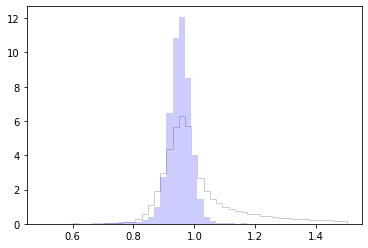

In [15]:
_,_,_=plt.hist(mjjs_secondhalf/mjjsg_secondhalf,weights=weights_secondhalf,bins=np.linspace(0.5,1.5,50),alpha=0.2,density=True,color="blue",label="QCD, Delphes")
_,_,_=plt.hist(1000*pres_mass/mjjsg_secondhalf,weights=weights_secondhalf,bins=np.linspace(0.5,1.5,50),alpha=0.2,density=True,color="black",histtype="step")

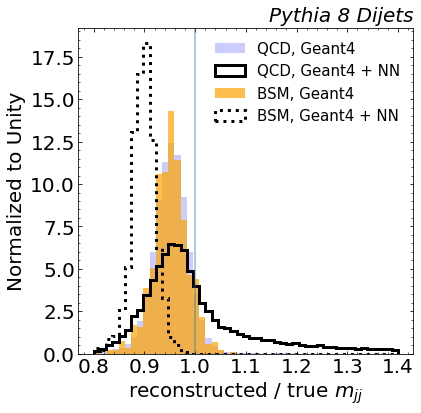

In [16]:
mybins = np.logspace(np.log(2000)/np.log(10),np.log(5000)/np.log(10),50)
mybinsB = np.linspace(0.8,1.4,50)

resmass = 2800

fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

_,_,_=plt.hist(mjjs_secondhalf/mjjsg_secondhalf,weights=weights_secondhalf,bins=mybinsB,alpha=0.2,density=True,color="blue",label="QCD, Geant4")
_,_,_=plt.hist(1000*pres_mass/mjjsg_secondhalf,weights=weights_secondhalf,bins=mybinsB,density=True,color="black",histtype="step",label="QCD, Geant4 + NN",lw=3)

ww,bins = np.histogram(mjjsg_secondhalf,bins=mybins)
ww = np.interp(mjjsg_secondhalf,0.5*(bins[:-1]+bins[1:]),ww)

_,_,_=plt.hist(mjjs_secondhalf/mjjsg_secondhalf,weights=norm.pdf(mjjsg_secondhalf,resmass,10)/ww,bins=mybinsB,alpha=0.7,density=True,color="orange",label="BSM, Geant4")
_,_,_=plt.hist(1000*pres_mass/mjjsg_secondhalf,weights=norm.pdf(mjjsg_secondhalf,resmass,10)/ww,bins=mybinsB,density=True,color="black",histtype="step",label="BSM, Geant4 + NN",lw=3,ls=":")

plt.ylabel("Normalized to Unity",fontsize=20)
#plt.xlim([mymin,mymax])
#plt.yscale("log")
#plt.ylim([1e-6,1e-1])
#plt.locator_params(axis='y', nbins=6)
plt.axvline(1,alpha=0.5)
plt.xlabel("reconstructed / true $m_{jj}$",fontsize=20)
plt.legend(frameon=False,fontsize=15,ncol=1)
_=plt.title("Pythia 8 Dijets",loc="right",fontsize=20, fontstyle="italic")
plt.savefig("NN_prior.pdf",bbox_inches='tight')

## Simulated-based Calibration with GA

In [17]:
from ifn.Architectures.utils import build_gIFN_DNN
from ifn.Architectures.ifn import IFN, mine_loss, MI


X, Y = np.expand_dims(mjjs_firsthalf/1000.0,1) , np.expand_dims(mjjsg_firsthalf/1000.0,1)

# Build model
ifn = build_gIFN_DNN(1, 1, [32, 32, 32], l2_reg = 0, d_l1_reg= 1e-3, )
ifn.pre_train([X, Y], epochs = 1, batch_size = 1024, verbose = True)
opt = tf.keras.optimizers.Adam(clipnorm = 1.0)
ifn.compile(loss=mine_loss, optimizer=opt, metrics = [MI,])


# Fit
history = ifn.fit([X, Y],
            batch_size= 1024,
            epochs = 150,
            sample_weight= weights_firsthalf,
            shuffle=True, verbose= 2)


Start of epoch 0

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

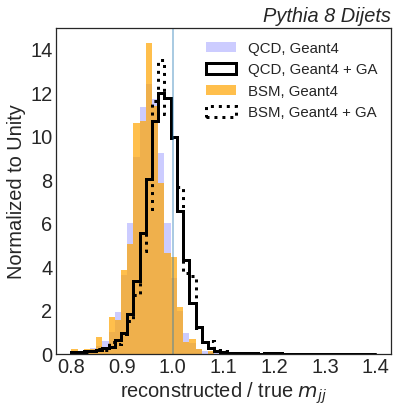

In [18]:
pres_mass = np.squeeze(ifn.maximum_likelihood(np.expand_dims(mjjs_secondhalf/1000.0, 1)))


mybins = np.logspace(np.log(2000)/np.log(10),np.log(5000)/np.log(10),50)
mybinsB = np.linspace(0.8,1.4,50)

resmass = 2800

fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

_,_,_=plt.hist(mjjs_secondhalf/mjjsg_secondhalf,weights=weights_secondhalf,bins=mybinsB,alpha=0.2,density=True,color="blue",label="QCD, Geant4")
_,_,_=plt.hist(1000*pres_mass/mjjsg_secondhalf,weights=weights_secondhalf,bins=mybinsB,density=True,color="black",histtype="step",label="QCD, Geant4 + GA",lw=3)

ww,bins = np.histogram(mjjsg_secondhalf,bins=mybins)
ww = np.interp(mjjsg_secondhalf,0.5*(bins[:-1]+bins[1:]),ww)

_,_,_=plt.hist(mjjs_secondhalf/mjjsg_secondhalf,weights=norm.pdf(mjjsg_secondhalf,resmass,10)/ww,bins=mybinsB,alpha=0.7,density=True,color="orange",label="BSM, Geant4")
_,_,_=plt.hist(1000*pres_mass/mjjsg_secondhalf,weights=norm.pdf(mjjsg_secondhalf,resmass,10)/ww,bins=mybinsB,density=True,color="black",histtype="step",label="BSM, Geant4 + GA",lw=3,ls=":")

plt.ylabel("Normalized to Unity",fontsize=20)
#plt.xlim([mymin,mymax])
#plt.yscale("log")
#plt.ylim([1e-6,1e-1])
#plt.locator_params(axis='y', nbins=6)
plt.axvline(1,alpha=0.5)
plt.xlabel("reconstructed / true $m_{jj}$",fontsize=20)
plt.legend(frameon=False,fontsize=15,ncol=1)
_=plt.title("Pythia 8 Dijets",loc="right",fontsize=20, fontstyle="italic")
plt.savefig("NN_prior_GA.pdf",bbox_inches='tight')

## Data-based Optimal Transport Calibration

In [19]:
x0_x = np.sort(mjjs_delphes_firsthalf)
w0_x = [x for _, x in sorted(zip(mjjs_delphes_firsthalf, weights_delphes_firsthalf))]
x0_ecdf = np.cumsum(w0_x)/np.sum(w0_x)

x1_x = np.sort(mjjs_firsthalf)
w1_x = [x for _, x in sorted(zip(mjjs_firsthalf, weights_firsthalf))]
x1_ecdf = np.cumsum(w1_x)/np.sum(w1_x)

def my_mjj_calib(x):
    firstpart = np.interp(x,x0_x,x0_ecdf)
    return np.interp(firstpart,x1_ecdf,x1_x)

<ipython-input-20-a5e09e17bcb3>:59: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(0.5*(b[1:]+b[:-1]),nt0/(nt1+0),color='black',ls=":")
<ipython-input-20-a5e09e17bcb3>:59: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[1:]+b[:-1]),nt0/(nt1+0),color='black',ls=":")
<ipython-input-20-a5e09e17bcb3>:60: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(0.5*(b[1:]+b[:-1]),nt/(nt1+0),color='blue',lw=4,alpha=0.7)


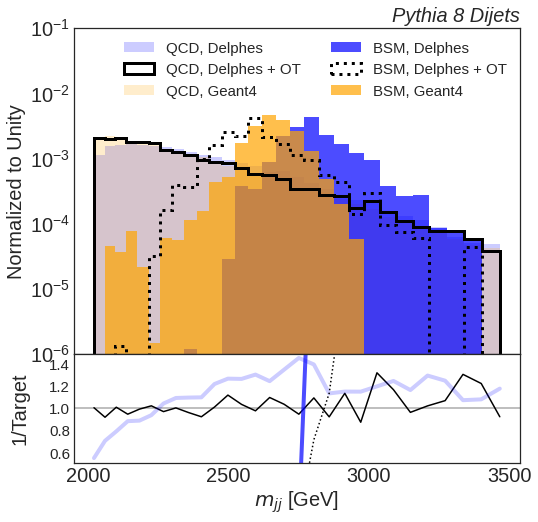

In [20]:
mybins = np.logspace(np.log(2000)/np.log(10),np.log(3500)/np.log(10),30)

resmass = 2800

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=0)
plt.yticks(fontsize=20)
ax0.minorticks_on()

nT,b,_=plt.hist(mjjs_delphes_secondhalf,weights=weights_delphes_secondhalf,bins=mybins,alpha=0.2,density=True,color="blue",label="QCD, Delphes")
nT0,_,_=plt.hist(my_mjj_calib(mjjs_delphes_secondhalf),weights=weights_delphes_secondhalf,bins=mybins,density=True,color="black",lw=3,histtype="step",label="QCD, Delphes + OT")
nT1,_,_=plt.hist(mjjs_secondhalf,weights=weights_secondhalf,bins=mybins,density=True,alpha=0.2,color="orange",label="QCD, Geant4")

###

ww,bins = np.histogram(mjjsg_secondhalf,bins=mybins)
ww = np.interp(mjjsg_secondhalf,0.5*(bins[:-1]+bins[1:]),ww)

ww_delphes,bins = np.histogram(mjjsg_delphes_secondhalf,bins=mybins)
ww_delphes = np.interp(mjjsg_delphes_secondhalf,0.5*(bins[:-1]+bins[1:]),ww_delphes)

nt,_,_=plt.hist(mjjs_delphes_secondhalf,weights=norm.pdf(mjjsg_delphes_secondhalf,resmass,10)/ww_delphes,bins=mybins,alpha=0.7,density=True,color="blue",label="BSM, Delphes")
nt0,_,_=plt.hist(my_mjj_calib(mjjs_delphes_secondhalf),weights=norm.pdf(mjjsg_delphes_secondhalf,resmass,10)/ww_delphes,bins=mybins,density=True,histtype="step",ls=":",lw=3,color="black",label="BSM, Delphes + OT")
nt1,_,_=plt.hist(mjjs_secondhalf,weights=norm.pdf(mjjsg_secondhalf,resmass,10)/ww,bins=mybins,alpha=0.7,density=True,color="orange",label="BSM, Geant4")

###

plt.ylabel("Normalized to Unity",fontsize=20)
plt.yscale("log")
plt.ylim([1e-6,1e-1])
plt.legend(frameon=False,fontsize=15,ncol=2)
_=plt.title("Pythia 8 Dijets",loc="right",fontsize=20, fontstyle="italic")

ax1 = plt.subplot(gs[1])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(direction="in",which="both")
ax1.minorticks_on()
plt.locator_params(axis='x', nbins=6)
plt.xlabel("$m_{jj}$ [GeV]",fontsize=20)
plt.ylabel("1/Target",fontsize=20, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

plt.axhline(y=1,linewidth=2, color='gray', alpha=0.5)  
plt.plot(0.5*(b[1:]+b[:-1]),nT0/(nT1+0),color='black')
plt.plot(0.5*(b[1:]+b[:-1]),nT/(nT1+0),color='blue',lw=4,alpha=0.2)

bb=0.5*(b[1:]+b[:-1])
nt[bb<2800]=0
nt0[bb<2800]=0
plt.plot(0.5*(b[1:]+b[:-1]),nt0/(nt1+0),color='black',ls=":")
plt.plot(0.5*(b[1:]+b[:-1]),nt/(nt1+0),color='blue',lw=4,alpha=0.7)

plt.ylim(0.51,1.49)
plt.savefig("OT.pdf",bbox_inches='tight')

## Gaussian examples

In [21]:
gauss_truth_prior = np.random.normal(0,1,20000)
gauss_reco_prior = np.random.normal(gauss_truth_prior,2,20000)
mycalibration = np.polyfit(gauss_reco_prior, gauss_truth_prior, 1)
mypoly = np.poly1d(mycalibration)

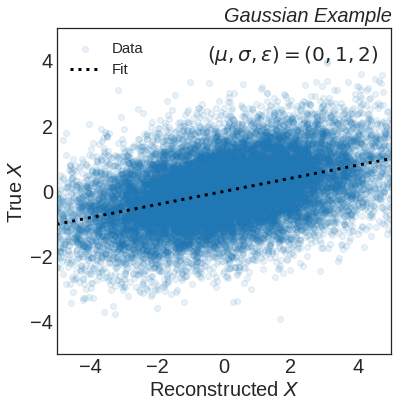

In [22]:
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.scatter(gauss_reco_prior,gauss_truth_prior,label="Data",alpha=0.1)
plt.plot(np.linspace(-5,5,20),mypoly(np.linspace(-5,5,20)),label="Fit",ls=":",color="black",lw=3)

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel("Reconstructed $X$",fontsize=20)
plt.ylabel("True $X$",fontsize=20)
plt.legend(frameon=False,fontsize=15,ncol=1)
_=plt.title(r"Gaussian Example",loc="right",fontsize=20, fontstyle="italic")
_=plt.text(-0.5,4,r"$(\mu,\sigma,\epsilon)=(0,1,2)$",fontsize=20)
plt.savefig("Gaussian_prior.pdf",bbox_inches='tight')

In [23]:
def b(x,sigma,epsilon,mu):
    return (sigma**2/(sigma**2+epsilon**2))*x+(epsilon**2/(sigma**2+epsilon**2))*mu

In [24]:
meanvals = np.array([np.mean(mypoly(np.random.normal(xx,2,10000))) for xx in np.linspace(-5,5,20)])
meanvals_analytic = b(np.linspace(-5,5,20),1,2,0)


Start of epoch 0

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

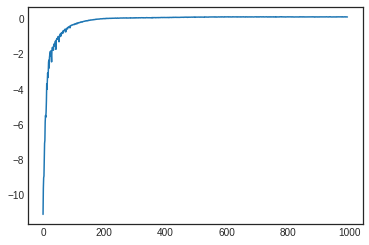

In [25]:

# GA numerical bias
from ifn.Architectures.utils import build_gIFN_DNN
from ifn.Architectures.ifn import IFN, mine_loss, MI
from ifn.Architectures.dnn import DNN
from ifn.Architectures.ifn import IFN, gIFN


x_dim = 1
y_dim = 1
A_layers = [16,16,16]
B_layers = [1,]
C_layers = [1,]
D_layers = [1,]
l2_reg = 1e-9
d_multiplier = 0.0
d_l1_reg = 1e-3


X, Y = np.expand_dims(gauss_reco_prior,1), np.expand_dims(gauss_truth_prior,1)

# # Build model
# ifn = build_gIFN_DNN(1, 1, [16,16,16], l2_reg = 1e-9, acts = 'relu', d_l1_reg= 1e-3, d_multiplier=0)

model_A = DNN(x_dim, A_layers, 1, l2_regs = l2_reg, acts = "relu")
model_B = DNN(x_dim, B_layers, y_dim, l2_regs = l2_reg, acts = "linear")
model_C = DNN([x_dim, y_dim], C_layers, [y_dim, y_dim], symmetrize=True, l2_regs = l2_reg, acts = "relu")
model_D = DNN(x_dim, D_layers, y_dim, l2_regs = l2_reg, acts = "relu")

ifn = gIFN(model_A, model_B, model_C, model_D, d_multiplier= d_multiplier, d_l1_reg = d_l1_reg, y_dim = y_dim)


ifn.pre_train([X, Y], epochs = 5, batch_size = 64, verbose = True)
opt = tf.keras.optimizers.Adam(lr = 1e-3)
ifn.compile(loss=mine_loss, optimizer=opt, metrics = [MI,])


# Fit
history = ifn.fit([X, Y],
            batch_size= 1024,
            epochs = 1000,
            shuffle=True, verbose= 2)

plt.plot(history.history["MI"][5:])

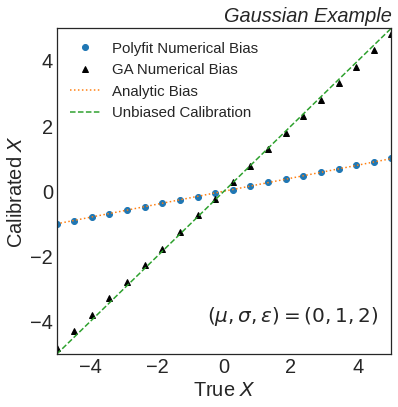

In [26]:
GA_meanvals =  np.squeeze(ifn.maximum_likelihood(np.expand_dims(np.linspace(-5,5,20), 1)))


fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.plot(np.linspace(-5,5,20),meanvals,marker='o',ls="",label="Polyfit Numerical Bias")
plt.plot(np.linspace(-5,5,20),GA_meanvals,marker='^',ls="",label="GA Numerical Bias", color = "black")
plt.plot(np.linspace(-5,5,20),meanvals_analytic,ls=":",label="Analytic Bias")
plt.plot(np.linspace(-5,5,20),np.linspace(-5,5,20),ls="--",label="Unbiased Calibration")

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel("True $X$",fontsize=20)
plt.ylabel("Calibrated $X$",fontsize=20)
plt.legend(frameon=False,fontsize=15,ncol=1)
_=plt.title("Gaussian Example",loc="right",fontsize=20, fontstyle="italic")
_=plt.text(-0.5,-4,r"$(\mu,\sigma,\epsilon)=(0,1,2)$",fontsize=20)
plt.savefig("Gaussian_prior2.pdf",bbox_inches='tight')

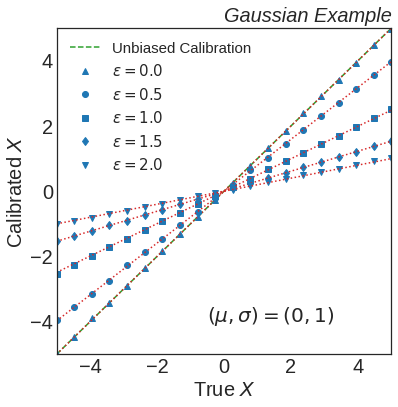

In [27]:
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.plot(np.linspace(-5,5,20),np.linspace(-5,5,20),ls="--",label="Unbiased Calibration",color="tab:green")
markers = ["^","o","s","d","v"]
myc=-1
for epsilon in np.linspace(0.01,2,5):
    myc+=1
    gauss_truth_prior_B = np.random.normal(0,1,10000)
    gauss_reco_prior_B = np.random.normal(gauss_truth_prior_B,epsilon,10000)
    mycalibration_B = np.polyfit(gauss_reco_prior_B, gauss_truth_prior_B, 1)
    mypoly_B = np.poly1d(mycalibration_B)

    meanvals_B = np.array([np.mean(mypoly_B(np.random.normal(xx,2,10000))) for xx in np.linspace(-5,5,20)])
    meanvals_analytic_B = b(np.linspace(-5,5,20),1,epsilon,0)

    plt.plot(np.linspace(-5,5,20),meanvals_B,marker=markers[myc],ls="",color="tab:blue",label="$\epsilon=%0.1f$" % epsilon)
    plt.plot(np.linspace(-5,5,20),meanvals_analytic_B,ls=":",color="tab:red")

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel("True $X$",fontsize=20)
plt.ylabel("Calibrated $X$",fontsize=20)
plt.legend(frameon=False,fontsize=15,ncol=1)
_=plt.title("Gaussian Example",loc="right",fontsize=20, fontstyle="italic")
_=plt.text(-0.5,-4,r"$(\mu,\sigma)=(0,1)$",fontsize=20)
plt.savefig("Gaussian_prior3.pdf",bbox_inches='tight')

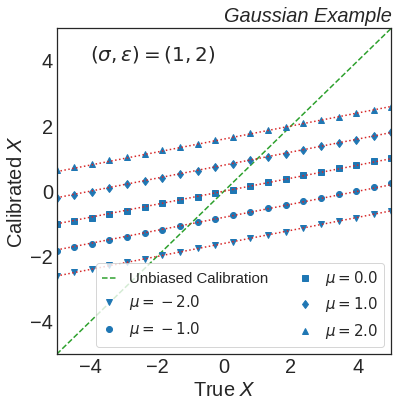

In [28]:
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.plot(np.linspace(-5,5,20),np.linspace(-5,5,20),ls="--",label="Unbiased Calibration",color="tab:green")
markers = ["v","o","s","d","^"]
myc=-1
for epsilon in np.linspace(-2,2,5):
    myc+=1
    gauss_truth_prior_B = np.random.normal(epsilon,1,10000)
    gauss_reco_prior_B = np.random.normal(gauss_truth_prior_B,2,10000)
    mycalibration_B = np.polyfit(gauss_reco_prior_B, gauss_truth_prior_B, 1)
    mypoly_B = np.poly1d(mycalibration_B)

    meanvals_B = np.array([np.mean(mypoly_B(np.random.normal(xx,2,10000))) for xx in np.linspace(-5,5,20)])
    meanvals_analytic_B = b(np.linspace(-5,5,20),1,2,epsilon)

    plt.plot(np.linspace(-5,5,20),meanvals_B,marker=markers[myc],ls="",color="tab:blue",label="$\mu=%0.1f$" % epsilon)
    plt.plot(np.linspace(-5,5,20),meanvals_analytic_B,ls=":",color="tab:red")

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel("True $X$",fontsize=20)
plt.ylabel("Calibrated $X$",fontsize=20)
plt.legend(frameon=True,fontsize=15,ncol=2,loc="lower right",handlelength=1)
_=plt.title("Gaussian Example",loc="right",fontsize=20, fontstyle="italic")
_=plt.text(-4,4,r"$(\sigma,\epsilon)=(1,2)$",fontsize=20)
plt.savefig("Gaussian_prior4.pdf",bbox_inches='tight')

## Gaussian, OT example